<a href="https://colab.research.google.com/github/rollways/JD_EDA/blob/main/item2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

--2022-01-04 07:01:31--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.81.206, 2607:f8b0:4004:82f::200e
Connecting to drive.google.com (drive.google.com)|142.250.81.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m0vl4g5csa2un6pj9g22icgukqlqutl6/1641279675000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-01-04 07:01:32--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m0vl4g5csa2un6pj9g22icgukqlqutl6/1641279675000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.81.193, 2607:f8b0:4004:82f::2001
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.250.81.193|

### load Data

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format',lambda x:'%.0f'%x)


data = pd.read_csv('/content/drive/MyDrive/T大使/data3_project.csv')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8,2019-01-01,1259,9100002488768,中區,2019-12-09,2018-06-24
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8,2019-01-01,839,9100002556566,中區,2018-10-21,2018-10-21
2,PS5335020955,BJ102,檸檬精油10ml MUI,8,2019-01-01,839,9100002556566,中區,2018-10-21,2018-10-21
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8,2019-01-01,-1501,9100002556566,中區,2018-10-21,2018-10-21
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8,2019-01-01,672,9100002582077,南區,2018-12-04,2018-12-04
...,...,...,...,...,...,...,...,...,...,...
1404430,PS5324024941,KQ02,玫瑰晶萃活膚液130ml,16,2020-12-31,2946,9100000595826,中區,2010-03-15,2012-07-11
1404431,PS5219002027,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8,2020-12-31,309,9100003028369,竹區,2020-12-08,2020-11-26
1404432,PS5219002027,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8,2020-12-31,1094,9100003028369,竹區,2020-12-08,2020-11-26
1404433,PS5219002027,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16,2020-12-31,165,9100003028369,竹區,2020-12-08,2020-11-26


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404435 entries, 0 to 1404434
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   InvoiceNo          1404435 non-null  object 
 1   StockCode          1404435 non-null  object 
 2   Description        1404435 non-null  object 
 3   Quantity           1404435 non-null  float64
 4   InvoiceDate        1404435 non-null  object 
 5   UnitPrice          1404435 non-null  float64
 6   CustomerID         1403724 non-null  float64
 7   Country            1404435 non-null  object 
 8   member_start_date  1366651 non-null  object 
 9   first_trans_date   1400412 non-null  object 
dtypes: float64(3), object(7)
memory usage: 107.2+ MB


In [4]:
data.isnull().any()

InvoiceNo            False
StockCode            False
Description          False
Quantity             False
InvoiceDate          False
UnitPrice            False
CustomerID            True
Country              False
member_start_date     True
first_trans_date      True
dtype: bool

In [5]:
data.drop(data.loc[data['CustomerID'].isna()].index,inplace=True)

In [6]:
data.isnull().any()

InvoiceNo            False
StockCode            False
Description          False
Quantity             False
InvoiceDate          False
UnitPrice            False
CustomerID           False
Country              False
member_start_date     True
first_trans_date      True
dtype: bool

In [7]:
#title
#聚合得到userID,itemID列表
df_group = data.groupby(['CustomerID'])['Description'].apply(lambda x:' '.join([str(m) for m in x])).reset_index()
df_group.head()

,CustomerID,Description
0,9100000000061,24H賦活液100ml 玫瑰晶萃瞬效霜30ml 超防禦UV潤色妝前乳30ml 旗艦無壓力頭S...
1,9100000000085,五日激光煥顏課程單堂 膠原晶球水導膜課程單堂 苦杏仁酸靚顏慕絲300ml 旗艦全背順氣活力S...
2,9100000000092,超導水網瞬效面膜26ml*6包 24小時黃金璀璨賦活液40ml 玫瑰晶萃露15ml 玫瑰晶萃...
3,9100000000115,玫瑰晶萃水面膜10ml*10支 DC原生龍血素30ml 阿甘髮膜1000ml 阿甘洗髮精10...
4,9100000000170,旗艦全背順氣活力SPA課程2.0單堂 世界花園旅行組(黑)


In [8]:
df_group.to_csv("/content/drive/MyDrive/T大使/itemlens_uid_itemids.csv",index=False)

### Use Pyspark train item2vec

In [9]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jre-headless_8u292-b10-0ubuntu1~18.04_amd64.deb  404  Not Found [IP: 91.189.88.142 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jdk-headless_8u292-b10-0ubuntu1~18.04_amd64.deb  404  Not Found [IP: 91.189.88.142 80]
E: Unable to fetch some archives, maybe run apt-get update or try with --fix-missing?


In [10]:
!pip install pyspark
!pip install findspark

In [11]:
#初始化spark
import findspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("PySpark Item2vec").getOrCreate()

sc = spark.sparkContext

In [12]:
df = spark.read.csv("/content/drive/MyDrive/T大使/itemlens_uid_itemids.csv" , header=True)
df.show(5)

+---------------+------------------------------------+
|     CustomerID|                         Description|
+---------------+------------------------------------+
|9100000000061.0|        24H賦活液100ml 玫瑰晶萃瞬...|
|9100000000085.0|五日激光煥顏課程單堂 膠原晶球水導...|
|9100000000092.0|       超導水網瞬效面膜26ml*6包 2...|
|9100000000115.0|        玫瑰晶萃水面膜10ml*10支 D...|
|9100000000170.0|     旗艦全背順氣活力SPA課程2.0單...|
+---------------+------------------------------------+
only showing top 5 rows



In [13]:
from pyspark.sql import functions as F
from pyspark.sql import types as T

#把字符串格式變成LIST形式
df = df.withColumn('Description', F.split(df.Description," "))

### 實現word(item)2vec的訓練與轉換

In [14]:
from pyspark.ml.feature import Word2Vec

word2Vec = Word2Vec(
    vectorSize=5,
    minCount=0,
    inputCol="Description",
    outputCol="Stock_2vec")

model = word2Vec.fit(df)

In [15]:
model.getVectors().select("word").show()

+--------------------------------+
|                            word|
+--------------------------------+
|       激活更新護理_臉部溫灸單堂|
|  2017MOMO購物網背部舒壓樂活課程|
|                            (3.0|
|           粹白茉莉柔嫩護手霜30g|
|         完美潔淨眼唇卸妝液115ml|
|               防曬外套(綠)短版M|
|晶透亮白超皮秒美肌加強版(S1+S...|
|                  如膠似漆ISLP34|
| 女神QQ玻尿酸海德密絲-CHIC(原價)|
|       激活更新護理_臉部刮痧單堂|
|              樂活淨化緊實按摩霜|
|          尊爵3C明眸舒壓課程單堂|
|        足部亮白深層修護課程單堂|
|                  轉店轉包補差額|
|            足部健甲凝膠課程單堂|
|         陶瓷熱塑V型提拉課程單堂|
|        花草舒緩香浴球50g-向日葵|
|             冰河淨化柔膚水130ml|
|      私密御守清潔露200ml-微涼感|
|                  內分泌調理單堂|
+--------------------------------+
only showing top 20 rows



/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [16]:
#不計算每個user的embedding,而是計算item的embedding
model.getVectors().show(3, truncate=False)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+------------------------------+---------------------------------------------------------------------------------------------------------+
|word                          |vector                                                                                                   |
+------------------------------+---------------------------------------------------------------------------------------------------------+
|激活更新護理_臉部溫灸單堂     |[0.44179868698120117,-1.041013479232788,0.2562239170074463,-0.38164904713630676,1.2132444381713867]      |
|2017MOMO購物網背部舒壓樂活課程|[-0.07771474123001099,-0.07492723315954208,-0.009174354374408722,-0.0994439348578453,0.10786374658346176]|
|(3.0                          |[1.1950634717941284,-0.9366973638534546,0.9865722060203552,0.1395719051361084,-0.8940256237983704]       |
+------------------------------+---------------------------------------------------------------------------------------------------------+
only showing top 3 rows



In [17]:
model.getVectors().select("Word","vector").toPandas().to_csv('/content/drive/MyDrive/T大使/stocklens_stock_embedding.csv',index=False)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


###使用T-SNE視覺化

In [18]:
model.getVectors().show(truncate=False)

+----------------------------------------+------------------------------------------------------------------------------------------------------------+
|word                                    |vector                                                                                                      |
+----------------------------------------+------------------------------------------------------------------------------------------------------------+
|激活更新護理_臉部溫灸單堂               |[0.44179868698120117,-1.041013479232788,0.2562239170074463,-0.38164904713630676,1.2132444381713867]         |
|2017MOMO購物網背部舒壓樂活課程          |[-0.07771474123001099,-0.07492723315954208,-0.009174354374408722,-0.0994439348578453,0.10786374658346176]   |
|(3.0                                    |[1.1950634717941284,-0.9366973638534546,0.9865722060203552,0.1395719051361084,-0.8940256237983704]          |
|粹白茉莉柔嫩護手霜30g                   |[0.15813200175762177,-0.006950621493160725,0.01484512910246849,-0.088161751627

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [19]:
word = model.getVectors().select("word")
word = np.array(word.select('word').collect())
word = word.reshape(-1)

item_v = model.getVectors().select("Vector")
item_v = np.array(item_v.select('vector').collect())

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [20]:
word.shape

(866,)

In [21]:
item_v.shape

(866, 1, 5)

In [22]:
item_v

array([[[ 0.44179869, -1.04101348,  0.25622392, -0.38164905,
          1.21324444]],

       [[-0.07771474, -0.07492723, -0.00917435, -0.09944393,
          0.10786375]],

       [[ 1.19506347, -0.93669736,  0.98657221,  0.13957191,
         -0.89402562]],

       ...,

       [[-0.07947816, -0.10135279, -0.28357792, -0.37416255,
          0.12161526]],

       [[ 0.22924906,  0.34591967, -0.00457379, -0.65391791,
          0.54482609]],

       [[ 0.0432913 , -0.07505429,  0.06023275, -0.06639181,
          0.0907388 ]]])

In [23]:
item_v = item_v.reshape(866,5)

### t-SNE

In [25]:
from sklearn import manifold

X_tsne = manifold.TSNE(n_components=2,init='random',random_state=5,verbose=1).fit_transform(item_v)

#Data Visualization
x_min,x_max = X_tsne.min(0),X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min) #Normalize

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 866 samples in 0.002s...
[t-SNE] Computed neighbors for 866 samples in 0.080s...
[t-SNE] Computed conditional probabilities for sample 866 / 866
[t-SNE] Mean sigma: 0.127930
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.487534
[t-SNE] KL divergence after 1000 iterations: 0.672052


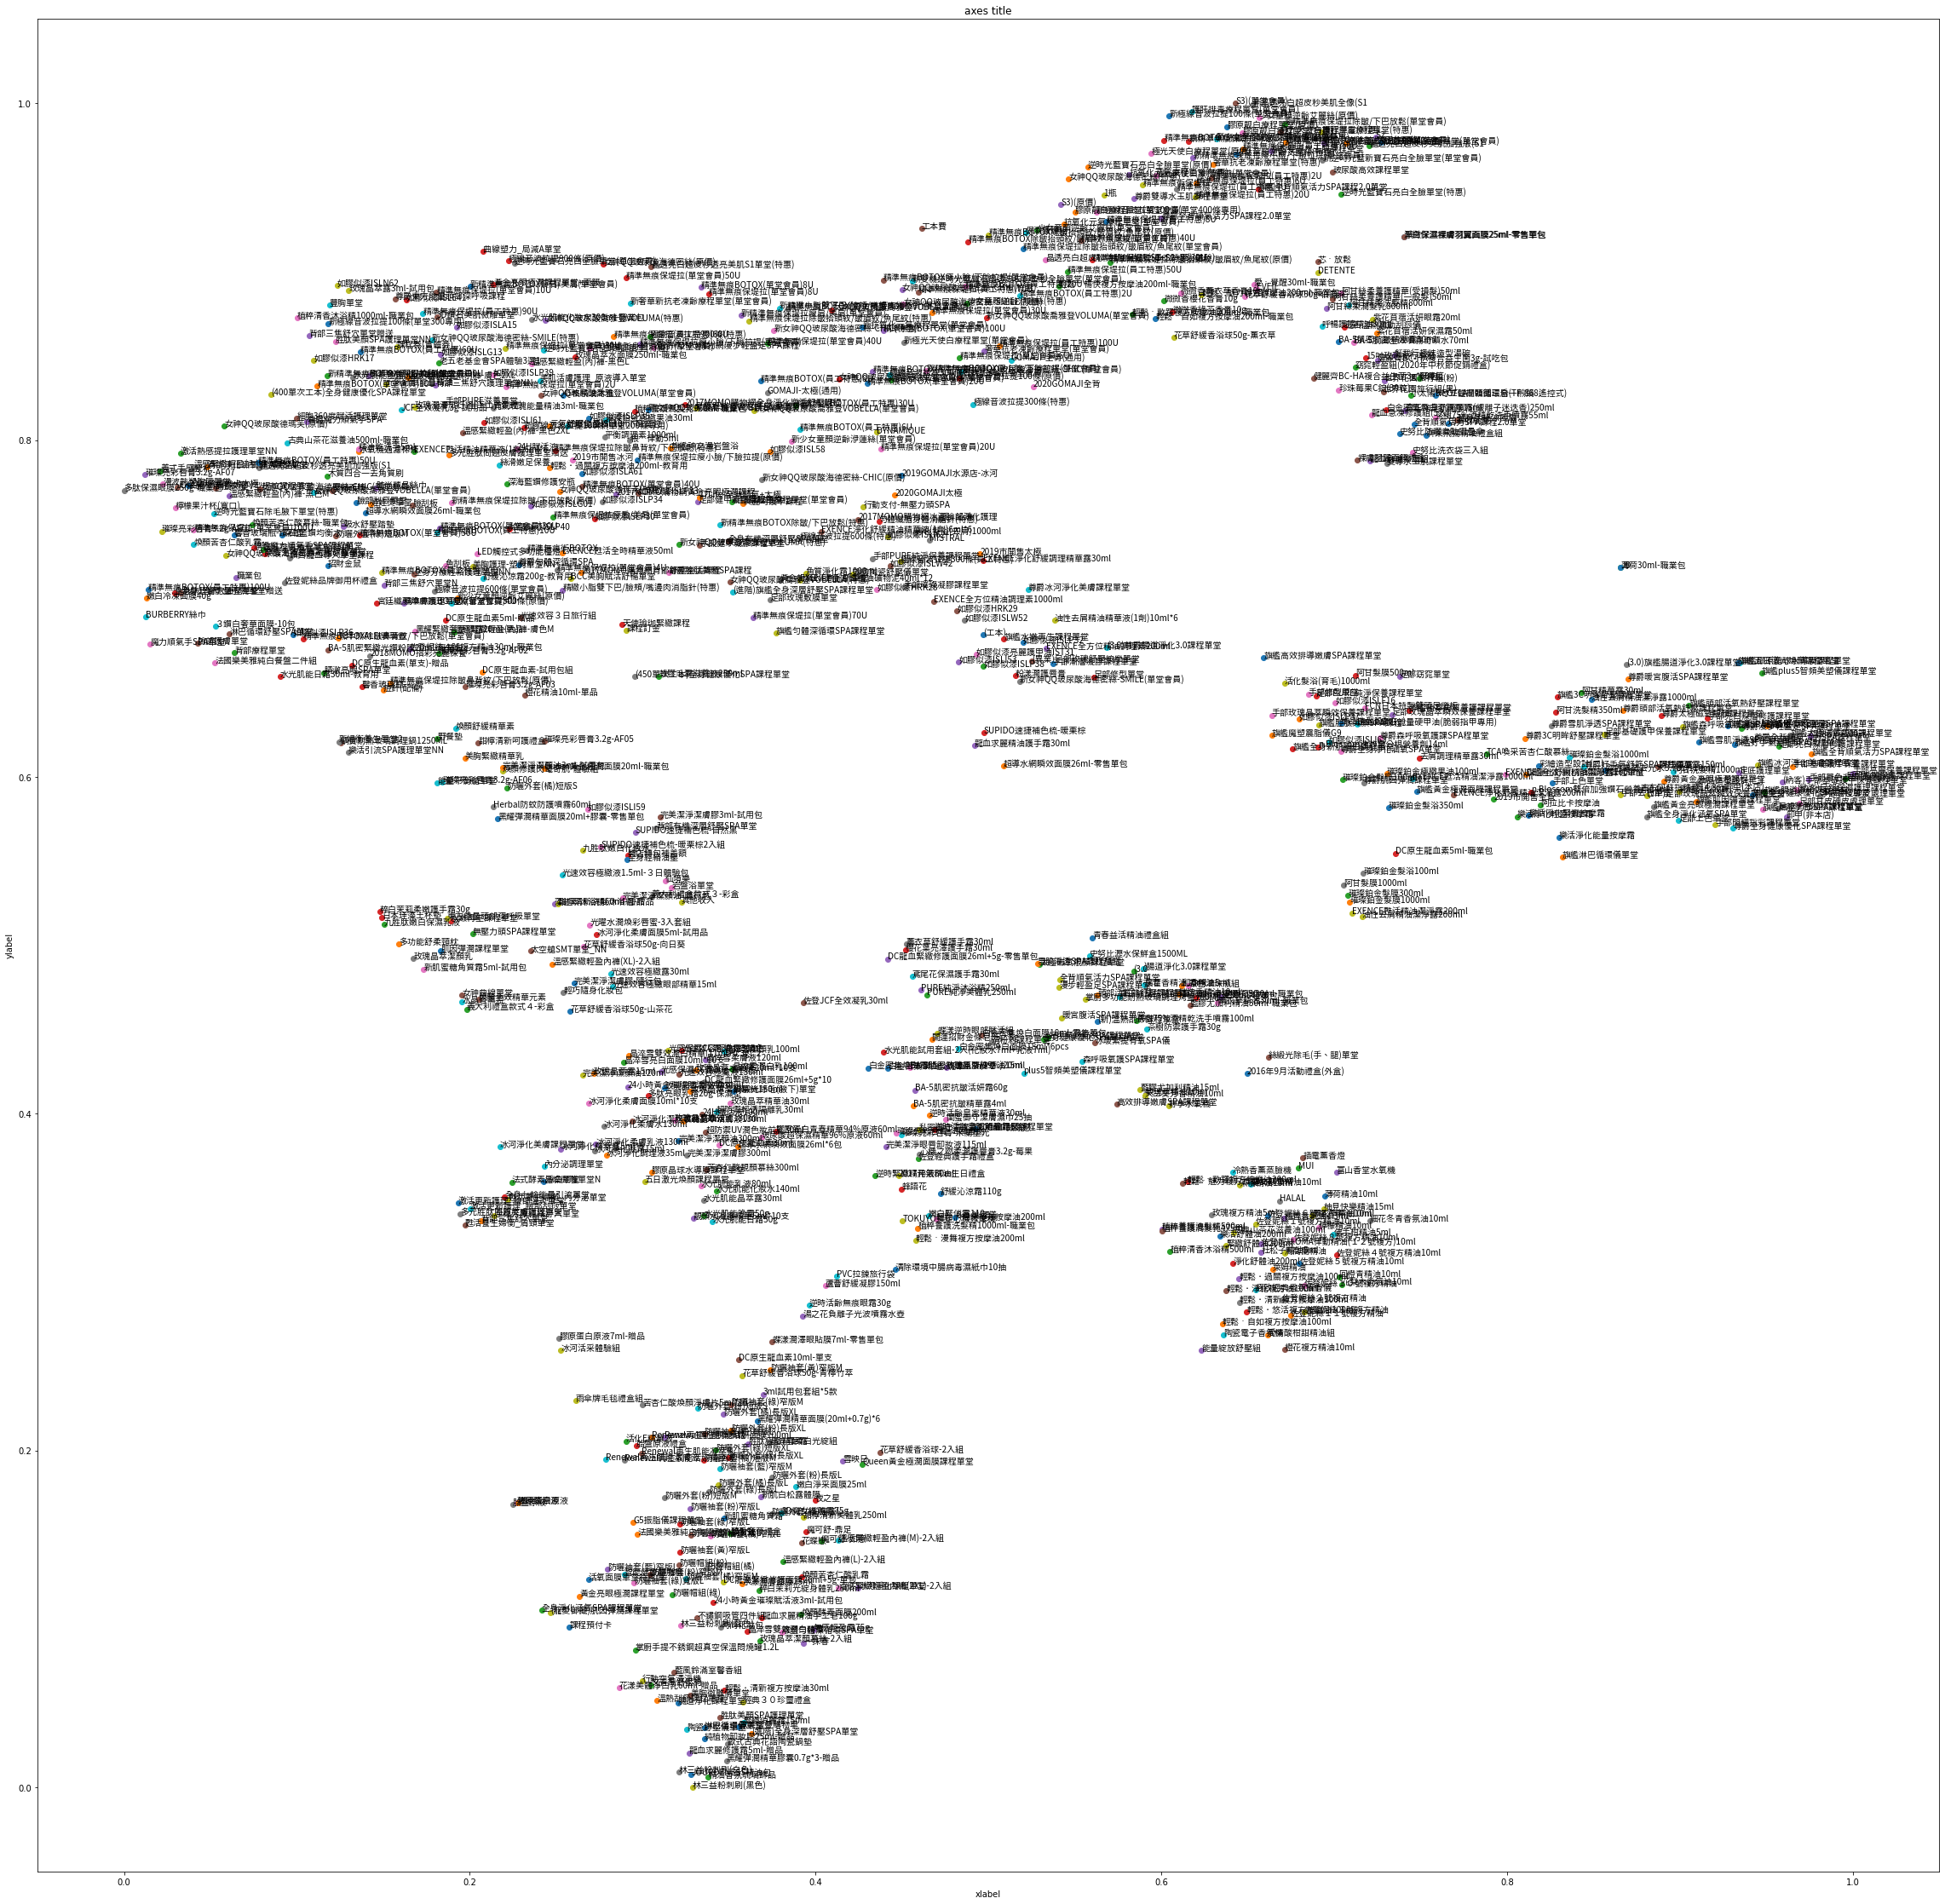

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot()
for i in range(X_norm.shape[0]):
  ax.scatter(X_norm[i,0],X_norm[i,1])
  ax.annotate(word[i],(X_norm[i,0],X_norm[i,1]),fontproperties=myfont)

ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

plt.show()